# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import csv

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Data Exploration 

In [8]:
filenames = []
for file in os.listdir('F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssf/data/'):
    filenames.append(os.path.join('F:/AI ML DL Projects/CSE499 ML Project/ml project data/ssf/data/', file))

FileNotFoundError: [Errno 2] No such file or directory: '/AI ML DL Projects/CSE499 ML Project/ml project data/ssf/data/'

In [ ]:
filenames[0:5]

In [ ]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = final_df.append(df)
        counter+=1
        
final_df

# data store

In [ ]:
#data store as pickle file
pickle.dump(final_df, open('cse499_ssf_female.pkl','wb'))

# data load

In [ ]:
final_df = pickle.load(open('cse499_ssf_female.pkl','rb'))
final_df.head()

# Data Pre-Processing and Analysis

In [ ]:
final_df = final_df[[
    'match_id',
    'innings',
    'info.dates',
    'info.gender',
    'info.match_type',
    'info.teams',
    'info.toss.winner',
    'info.toss.decision',
    'info.outcome.winner',
    'info.outcome.by.runs',
    'info.outcome.by.wickets',
    'info.overs',
    'info.umpires',
    'info.venue',
    'info.city'
]]

final_df.head()

In [ ]:
final_df['info.gender'].value_counts()

In [ ]:
final_df['info.match_type'].value_counts()

In [ ]:
final_df['info.overs'].value_counts()

In [ ]:
# Remove 50 over match data
final_df = final_df[final_df['info.overs'] == 20]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df.shape

# extract first & second innings data

In [ ]:
# No Result Matches
final_df[final_df['info.outcome.winner'].isnull()]

# remove no result matches

In [ ]:
final_df = final_df.dropna(subset=['info.outcome.winner'])
final_df.shape

In [ ]:
final_df.iloc[0]['innings'][0]['1st innings']['deliveries']

In [3]:
count = 0
delivery_df_1st_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_1st_innings = delivery_df_1st_innings.append(loop_df)

NameError: name 'final_df' is not defined

In [4]:
delivery_df_1st_innings.head()

""


In [5]:
count = 0
delivery_df_2nd_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][1]['2nd innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][1]['2nd innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_2nd_innings = delivery_df_2nd_innings.append(loop_df)

NameError: name 'final_df' is not defined

In [6]:
delivery_df_2nd_innings.head()

""


In [7]:
run_data = delivery_df_1st_innings.groupby(['match_id', 'runs'])['runs'].count().reset_index(name="count")

KeyError: 'match_id'

In [ ]:
run_data.head()

# batting and bowling team separation

In [ ]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [27]:
# First Innings
delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings.apply(bowl,axis=1)

delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Otago, Central Districts]",Otago,Otago,72.0,NaN,0.1,0,0,Napier,McLean Park,Central Districts
1,1,"[Otago, Central Districts]",Otago,Otago,72.0,NaN,0.2,1,0,Napier,McLean Park,Central Districts
2,1,"[Otago, Central Districts]",Otago,Otago,72.0,NaN,0.3,0,0,Napier,McLean Park,Central Districts
3,1,"[Otago, Central Districts]",Otago,Otago,72.0,NaN,0.4,4,0,Napier,McLean Park,Central Districts
4,1,"[Otago, Central Districts]",Otago,Otago,72.0,NaN,0.5,0,0,Napier,McLean Park,Central Districts


In [28]:
# Second Innings 
delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings.apply(bowl,axis=1)

delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Otago, Central Districts]",Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,McLean Park,Otago
1,1,"[Otago, Central Districts]",Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,McLean Park,Otago
2,1,"[Otago, Central Districts]",Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,McLean Park,Otago
3,1,"[Otago, Central Districts]",Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,McLean Park,Otago
4,1,"[Otago, Central Districts]",Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,McLean Park,Otago


In [29]:
# Drop columns
delivery_df_1st_innings.drop(columns=['teams'],inplace=True)
delivery_df_2nd_innings.drop(columns=['teams'],inplace=True)

In [30]:
delivery_df_1st_innings['batting_team'].unique()

array(['Otago', 'Wellington', 'Central Districts', 'Northern Districts',
       'Canterbury', 'Auckland'], dtype=object)

In [115]:
# First Innings
# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Thunder','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Thunder','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')

# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Sylhet Royals','Sylhet Strikers')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Sylhet Royals','Sylhet Strikers')

# Second Innings
# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Super Stars','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Thunder','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Thunder','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Sunrisers','Sylhet Strikers')

# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Sylhet Royals','Sylhet Strikers')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Sylhet Royals','Sylhet Strikers')

In [31]:
delivery_df_2nd_innings['batting_team'].unique()

array(['Central Districts', 'Northern Districts', 'Auckland',
       'Canterbury', 'Wellington', 'Otago'], dtype=object)

# venue and city

In [32]:
delivery_df_2nd_innings.isnull().sum()

match_id               0
winner                 0
win_by_runs         4823
win_by_wickets      6496
batting_team           0
ball                   0
runs                   0
player_dismissed       0
city                   0
venue                  0
bowling_team           0
dtype: int64

In [33]:
delivery_df_1st_innings['venue'].unique()

array(['McLean Park', 'Basin Reserve', 'Eden Park Outer Oval',
       'Hagley Oval', 'University Oval', 'Bay Oval', 'Molyneux Park',
       'Pukekura Park', 'Seddon Park', 'Hagley Oval, Christchurch',
       'Eden Park Outer Oval, Auckland', 'University Oval, Dunedin',
       'Seddon Park, Hamilton', 'Basin Reserve, Wellington',
       'McLean Park, Napier', 'Bay Oval, Mount Maunganui',
       'Fitzherbert Park, Palmerston North',
       'John Davies Oval, Queenstown', 'Pukekura Park, New Plymouth',
       'Eden Park, Auckland', 'Cobham Oval (New), Whangarei',
       'Saxton Oval, Nelson'], dtype=object)

In [34]:
delivery_df_1st_innings['city'].unique()

array(['Napier', 'Wellington', 'Auckland', 'Christchurch', 'Dunedin',
       'Mount Maunganui', 'Alexandra', 'New Plymouth', 'Hamilton',
       'Palmerston North', 'Queenstown', 'Whangarei', 'Nelson'],
      dtype=object)

In [35]:
delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isnull()]['venue'].value_counts()

Series([], Name: venue, dtype: int64)

In [36]:
# First Innings
# cities = np.where(delivery_df_1st_innings['city'].isnull(), delivery_df_1st_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_1st_innings['city'])
# delivery_df_1st_innings['city'] = cities

# Second Innings
# cities = np.where(delivery_df_2nd_innings['city'].isnull(), delivery_df_2nd_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_2nd_innings['city'])
# delivery_df_2nd_innings['city'] = cities

In [37]:
# Drop Venue Column

# First Innings
delivery_df_1st_innings.drop(columns=['venue'],inplace=True)
# Second Innings
delivery_df_2nd_innings.drop(columns=['venue'],inplace=True)

In [38]:
delivery_df_1st_innings['city'].value_counts()

Wellington          2358
Christchurch        2244
Auckland            2137
Dunedin             1437
New Plymouth        1051
Hamilton             709
Mount Maunganui      708
Queenstown           505
Napier               489
Alexandra            256
Palmerston North     248
Nelson               125
Whangarei             98
Name: city, dtype: int64

In [39]:
delivery_df_2nd_innings['city'].value_counts()

Christchurch        2119
Wellington          2049
Auckland            1957
Dunedin             1314
New Plymouth         987
Mount Maunganui      698
Hamilton             676
Queenstown           481
Napier               415
Palmerston North     245
Alexandra            224
Nelson               115
Whangarei             39
Name: city, dtype: int64

In [40]:
# Keeping only those venues where played atleast 5 matches

# First Innings
eligible_cities = delivery_df_1st_innings['city'].value_counts()[delivery_df_1st_innings['city'].value_counts() > 300].index.tolist()
delivery_df_1st_innings = delivery_df_1st_innings[delivery_df_1st_innings['city'].isin(eligible_cities)]

# Second Innings
eligible_cities = delivery_df_2nd_innings['city'].value_counts()[delivery_df_2nd_innings['city'].value_counts() > 300].index.tolist()
delivery_df_2nd_innings = delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isin(eligible_cities)]

In [41]:
delivery_df_1st_innings['city'].unique()

array(['Napier', 'Wellington', 'Auckland', 'Christchurch', 'Dunedin',
       'Mount Maunganui', 'New Plymouth', 'Hamilton', 'Queenstown'],
      dtype=object)

# current score

In [42]:
# First Innings
delivery_df_1st_innings['current_score'] = delivery_df_1st_innings.groupby('match_id').cumsum()['runs']

# Second Innings
delivery_df_2nd_innings['current_score'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['runs']

In [43]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5


# wicket left

In [44]:
# First Innings
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].astype('int')
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_1st_innings['wickets_left'] = 10 - delivery_df_1st_innings['player_dismissed']

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,1,Otago,Otago,72.0,NaN,0.1,0,0,Napier,Central Districts,0,10
1,1,Otago,Otago,72.0,NaN,0.2,1,0,Napier,Central Districts,1,10
2,1,Otago,Otago,72.0,NaN,0.3,0,0,Napier,Central Districts,1,10
3,1,Otago,Otago,72.0,NaN,0.4,4,0,Napier,Central Districts,5,10
4,1,Otago,Otago,72.0,NaN,0.5,0,0,Napier,Central Districts,5,10


In [45]:
# Second Innings
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].astype('int')
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_2nd_innings['wickets_left'] = 10 - delivery_df_2nd_innings['player_dismissed']

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4,10
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5,10
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5,10
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5,10
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5,10


# bowl delivered & bowl left

In [46]:
# First Innings
delivery_df_1st_innings['over'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_1st_innings['ball_no'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_1st_innings['balls_bowled'] = (delivery_df_1st_innings['over'].astype('int')*6) + delivery_df_1st_innings['ball_no'].astype('int')
delivery_df_1st_innings['balls_left'] = 120 - delivery_df_1st_innings['balls_bowled']
delivery_df_1st_innings['balls_left'] = delivery_df_1st_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,1,Otago,Otago,72.0,NaN,0.1,0,0,Napier,Central Districts,0,10,0,1,1,119
1,1,Otago,Otago,72.0,NaN,0.2,1,0,Napier,Central Districts,1,10,0,2,2,118
2,1,Otago,Otago,72.0,NaN,0.3,0,0,Napier,Central Districts,1,10,0,3,3,117
3,1,Otago,Otago,72.0,NaN,0.4,4,0,Napier,Central Districts,5,10,0,4,4,116
4,1,Otago,Otago,72.0,NaN,0.5,0,0,Napier,Central Districts,5,10,0,5,5,115


In [47]:
# Second Innings
delivery_df_2nd_innings['over'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_2nd_innings['ball_no'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_2nd_innings['balls_bowled'] = (delivery_df_2nd_innings['over'].astype('int')*6) + delivery_df_2nd_innings['ball_no'].astype('int')
delivery_df_2nd_innings['balls_left'] = 120 - delivery_df_2nd_innings['balls_bowled']
delivery_df_2nd_innings['balls_left'] = delivery_df_2nd_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4,10,0,1,1,119
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5,10,0,2,2,118
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5,10,0,3,3,117
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5,10,0,4,4,116
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5,10,0,5,5,115


# current run rate

In [48]:
# First Innings
delivery_df_1st_innings['crr'] = round((delivery_df_1st_innings['current_score']*6)/delivery_df_1st_innings['balls_bowled'], 2)

# Second Innings
delivery_df_2nd_innings['crr'] = round((delivery_df_2nd_innings['current_score']*6)/delivery_df_2nd_innings['balls_bowled'], 2)

In [49]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4,10,0,1,1,119,24.0
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5,10,0,2,2,118,15.0
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5,10,0,3,3,117,10.0
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5,10,0,4,4,116,7.5
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5,10,0,5,5,115,6.0


# Score and Win Probabilty (before the start of the match and during the first innings)

# total score counting according to match

In [50]:
total_df = delivery_df_1st_innings.groupby('match_id').sum()['runs'].reset_index()
score_probability_output = delivery_df_1st_innings.merge(total_df,on='match_id')

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y
0,1,Otago,Otago,72.0,NaN,0.1,0,0,Napier,Central Districts,0,10,0,1,1,119,0.0,181
1,1,Otago,Otago,72.0,NaN,0.2,1,0,Napier,Central Districts,1,10,0,2,2,118,3.0,181
2,1,Otago,Otago,72.0,NaN,0.3,0,0,Napier,Central Districts,1,10,0,3,3,117,2.0,181
3,1,Otago,Otago,72.0,NaN,0.4,4,0,Napier,Central Districts,5,10,0,4,4,116,7.5,181
4,1,Otago,Otago,72.0,NaN,0.5,0,0,Napier,Central Districts,5,10,0,5,5,115,6.0,181


# counting runs in remaining balls

In [51]:
score_probability_output['runs_in_remaining_ball'] = score_probability_output['runs_y'] - score_probability_output['current_score']

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball
0,1,Otago,Otago,72.0,NaN,0.1,0,0,Napier,Central Districts,0,10,0,1,1,119,0.0,181,181
1,1,Otago,Otago,72.0,NaN,0.2,1,0,Napier,Central Districts,1,10,0,2,2,118,3.0,181,180
2,1,Otago,Otago,72.0,NaN,0.3,0,0,Napier,Central Districts,1,10,0,3,3,117,2.0,181,180
3,1,Otago,Otago,72.0,NaN,0.4,4,0,Napier,Central Districts,5,10,0,4,4,116,7.5,181,176
4,1,Otago,Otago,72.0,NaN,0.5,0,0,Napier,Central Districts,5,10,0,5,5,115,6.0,181,176


# consider batting team win

In [52]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

score_probability_output['result_first_innings'] = score_probability_output.apply(result, axis=1)

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball,result_first_innings
0,1,Otago,Otago,72.0,NaN,0.1,0,0,Napier,Central Districts,0,10,0,1,1,119,0.0,181,181,1
1,1,Otago,Otago,72.0,NaN,0.2,1,0,Napier,Central Districts,1,10,0,2,2,118,3.0,181,180,1
2,1,Otago,Otago,72.0,NaN,0.3,0,0,Napier,Central Districts,1,10,0,3,3,117,2.0,181,180,1
3,1,Otago,Otago,72.0,NaN,0.4,4,0,Napier,Central Districts,5,10,0,4,4,116,7.5,181,176,1
4,1,Otago,Otago,72.0,NaN,0.5,0,0,Napier,Central Districts,5,10,0,5,5,115,6.0,181,176,1


# final data for score probabilty 

In [53]:
final_score_probability_df = score_probability_output[['batting_team','bowling_team','city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left','crr', 'runs_in_remaining_ball']]
final_score_probability_df.head()

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Otago,Central Districts,Napier,0,1,119,10,0.0,181
1,Otago,Central Districts,Napier,1,2,118,10,3.0,180
2,Otago,Central Districts,Napier,1,3,117,10,2.0,180
3,Otago,Central Districts,Napier,5,4,116,10,7.5,176
4,Otago,Central Districts,Napier,5,5,115,10,6.0,176


In [54]:
final_score_probability_df = final_score_probability_df[final_score_probability_df['balls_left'] != 0]
final_score_probability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Otago,Central Districts,Napier,0,1,119,10,0.00,181
1,Otago,Central Districts,Napier,1,2,118,10,3.00,180
2,Otago,Central Districts,Napier,1,3,117,10,2.00,180
3,Otago,Central Districts,Napier,5,4,116,10,7.50,176
4,Otago,Central Districts,Napier,5,5,115,10,6.00,176
...,...,...,...,...,...,...,...,...,...
11632,Canterbury,Wellington,Christchurch,139,115,5,3,7.25,6
11633,Canterbury,Wellington,Christchurch,139,116,4,2,7.19,6
11634,Canterbury,Wellington,Christchurch,140,117,3,1,7.18,5
11635,Canterbury,Wellington,Christchurch,141,118,2,1,7.17,4


# final innings score probability data extraction

In [55]:
pickle.dump(final_score_probability_df, open('ssf_womens_first_innings_score.pkl','wb'))

# win probabilty

In [56]:
final_win_probability_df = score_probability_output[[
    'batting_team',
    'bowling_team',
    'city',
    'runs_y',
    'result_first_innings'
]]

final_win_probability_df.head()

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Otago,Central Districts,Napier,181,1
1,Otago,Central Districts,Napier,181,1
2,Otago,Central Districts,Napier,181,1
3,Otago,Central Districts,Napier,181,1
4,Otago,Central Districts,Napier,181,1


# final first innings win data extraction

In [57]:
pickle.dump(final_win_probability_df, open('ssf_womens_first_innings_win.pkl','wb'))

# Win Probabilty (during the second innings)

# target runs from first innings

In [58]:
total_score_df = delivery_df_1st_innings.groupby([
    'match_id',
]).sum()['runs'].reset_index()

total_score_df.head()

,match_id,runs
0,1,181
1,2,183
2,3,138
3,4,125
4,5,96


In [59]:
total_score_df['target_runs'] = total_score_df['runs'] + 1
total_score_df.drop(columns=['runs'], inplace=True)

total_score_df.head()

,match_id,target_runs
0,1,182
1,2,184
2,3,139
3,4,126
4,5,97


# merge with second innings data

In [60]:
final_2nd_innings_win_df = delivery_df_2nd_innings.merge(total_score_df, on='match_id')
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4,10,0,1,1,119,24.0,182
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5,10,0,2,2,118,15.0,182
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5,10,0,3,3,117,10.0,182
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5,10,0,4,4,116,7.5,182
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5,10,0,5,5,115,6.0,182


# runs left

In [61]:
final_2nd_innings_win_df['runs_left'] = final_2nd_innings_win_df['target_runs'] - final_2nd_innings_win_df['current_score']
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4,10,0,1,1,119,24.0,182,178
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5,10,0,2,2,118,15.0,182,177
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5,10,0,3,3,117,10.0,182,177
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5,10,0,4,4,116,7.5,182,177
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5,10,0,5,5,115,6.0,182,177


# required run rate

In [62]:
final_2nd_innings_win_df['rrr'] = round((final_2nd_innings_win_df['runs_left']*6)/final_2nd_innings_win_df['balls_left'], 2)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,4,10,0,1,1,119,24.0,182,178,8.97
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,5,10,0,2,2,118,15.0,182,177,9.00
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,5,10,0,3,3,117,10.0,182,177,9.08
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,5,10,0,4,4,116,7.5,182,177,9.16
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,5,10,0,5,5,115,6.0,182,177,9.23


In [63]:
final_2nd_innings_win_df.isnull().sum()

match_id               0
winner                 0
win_by_runs         4571
win_by_wickets      6125
batting_team           0
ball                   0
runs                   0
player_dismissed       0
city                   0
bowling_team           0
current_score          0
wickets_left           0
over                   0
ball_no                0
balls_bowled           0
balls_left             0
crr                    0
target_runs            0
runs_left              0
rrr                    1
dtype: int64

In [64]:
final_2nd_innings_win_df = final_2nd_innings_win_df[final_2nd_innings_win_df['balls_left'] != 0]

In [65]:
final_2nd_innings_win_df.isnull().sum()

match_id               0
winner                 0
win_by_runs         4570
win_by_wickets      6093
batting_team           0
ball                   0
runs                   0
player_dismissed       0
city                   0
bowling_team           0
current_score          0
wickets_left           0
over                   0
ball_no                0
balls_bowled           0
balls_left             0
crr                    0
target_runs            0
runs_left              0
rrr                    0
dtype: int64

# consider batting team win

In [66]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final_2nd_innings_win_df['result'] = final_2nd_innings_win_df.apply(result, axis=1)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,...,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr,result
0,1,Otago,72.0,NaN,Central Districts,0.1,4,0,Napier,Otago,...,10,0,1,1,119,24.0,182,178,8.97,0
1,1,Otago,72.0,NaN,Central Districts,0.2,1,0,Napier,Otago,...,10,0,2,2,118,15.0,182,177,9.00,0
2,1,Otago,72.0,NaN,Central Districts,0.3,0,0,Napier,Otago,...,10,0,3,3,117,10.0,182,177,9.08,0
3,1,Otago,72.0,NaN,Central Districts,0.4,0,0,Napier,Otago,...,10,0,4,4,116,7.5,182,177,9.16,0
4,1,Otago,72.0,NaN,Central Districts,0.5,0,0,Napier,Otago,...,10,0,5,5,115,6.0,182,177,9.23,0


# final data for second innings win

In [67]:
final_2nd_innings_win_df = final_2nd_innings_win_df[[
    'batting_team',
    'bowling_team',
    'city',
    'current_score',
    'target_runs',
    'runs_left',
    'balls_left',
    'wickets_left',
    'crr',
    'rrr',
    'result'
]]

final_2nd_innings_win_df.head()

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Central Districts,Otago,Napier,4,182,178,119,10,24.0,8.97,0
1,Central Districts,Otago,Napier,5,182,177,118,10,15.0,9.00,0
2,Central Districts,Otago,Napier,5,182,177,117,10,10.0,9.08,0
3,Central Districts,Otago,Napier,5,182,177,116,10,7.5,9.16,0
4,Central Districts,Otago,Napier,5,182,177,115,10,6.0,9.23,0


# final second innings win data extraction

In [68]:
pickle.dump(final_2nd_innings_win_df, open('ssf_womens_second_innings_win.pkl','wb'))

# Machine Learning Model

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

# score probability 

In [14]:
#load data
score_portability_df = pickle.load(open('ssf_womens_first_innings_score.pkl','rb'))
score_portability_df.shape

(11545, 9)

In [15]:
score_portability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Otago,Central Districts,Napier,0,1,119,10,0.00,181
1,Otago,Central Districts,Napier,1,2,118,10,3.00,180
2,Otago,Central Districts,Napier,1,3,117,10,2.00,180
3,Otago,Central Districts,Napier,5,4,116,10,7.50,176
4,Otago,Central Districts,Napier,5,5,115,10,6.00,176
...,...,...,...,...,...,...,...,...,...
11632,Canterbury,Wellington,Christchurch,139,115,5,3,7.25,6
11633,Canterbury,Wellington,Christchurch,139,116,4,2,7.19,6
11634,Canterbury,Wellington,Christchurch,140,117,3,1,7.18,5
11635,Canterbury,Wellington,Christchurch,141,118,2,1,7.17,4


In [16]:
score_portability_df.isnull().sum()

batting_team              0
bowling_team              0
city                      0
current_score             0
balls_bowled              0
balls_left                0
wickets_left              0
crr                       0
runs_in_remaining_ball    0
dtype: int64

In [17]:
X = score_portability_df.drop(columns=['runs_in_remaining_ball'])
y = score_portability_df['runs_in_remaining_ball'].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [18]:
X_train

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr
10037,Northern Districts,Canterbury,Christchurch,1,5,115,10,1.20
1002,Northern Districts,Canterbury,Mount Maunganui,8,8,112,10,6.00
3380,Northern Districts,Canterbury,Hamilton,109,105,15,5,6.23
2004,Wellington,Northern Districts,Mount Maunganui,109,100,20,6,6.54
1341,Otago,Auckland,Auckland,87,98,22,6,5.33
...,...,...,...,...,...,...,...,...
7874,Canterbury,Northern Districts,Christchurch,59,45,75,9,7.87
11044,Northern Districts,Central Districts,Hamilton,18,14,106,8,7.71
912,Auckland,Wellington,Wellington,47,42,78,9,6.71
5233,Otago,Central Districts,Dunedin,102,93,27,8,6.58


In [19]:
y_train

array([100, 102,  15, ...,  92,  32,  39])

In [20]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'), ['batting_team','bowling_team','city'])
]
,remainder='passthrough')

# XgBoosting

In [21]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=20, random_state=1))
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.2,
                              max_delta_step=0, max_depth=20,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=1, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [22]:
y_pred = pipe.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred)))

R-Square Score: 0.9827510236279371
Mean Absolute Error: 2.156166349212191


In [23]:
predictions_xgb = pipe.predict(X_test)
sample_xgb = pd.DataFrame(predictions_xgb, columns=['Predict'])
sample_xgb['Actual']=y_test
sample_xgb.head(20)

,Predict,Actual
0,115.719315,116
1,111.512611,110
2,137.180023,138
3,112.915154,113
4,56.538231,53
5,72.935684,74
6,83.144081,81
7,30.323269,31
8,13.825212,14
9,22.918369,21


In [24]:
score_portability_df['city'].unique()

array(['Napier', 'Wellington', 'Auckland', 'Christchurch', 'Dunedin',
       'Mount Maunganui', 'New Plymouth', 'Hamilton', 'Queenstown'],
      dtype=object)

In [25]:
score_portability_df['batting_team'].unique()

array(['Otago', 'Wellington', 'Central Districts', 'Northern Districts',
       'Canterbury', 'Auckland'], dtype=object)

# result count first way

In [27]:
input_df = pd.DataFrame({'batting_team': ['Northern Districts'], 'bowling_team': ['Canterbury'], 'city': ['Christchurch'], 'current_score': [170], 'balls_bowled': [108], 'balls_left': [12], 'wickets_left': [6], 'crr': [9.44]})
result = pipe.predict(input_df)[0]

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 170)-8)+ ' to '+str(math.floor(result + 170)+4))

Probable Score: 180 to 192


# result count second way

In [29]:
result = pipe.predict(pd.DataFrame([['Northern Districts', 'Canterbury', 'Christchurch', 60, 90, 30, 10, 4.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr']))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 79 to 89


# Random Forest 

In [30]:
pipe_rf = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor())
])

pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', RandomForestRegressor())])

In [31]:
y_pred_rf = pipe_rf.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred_rf)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred_rf)))

R-Square Score: 0.9838095107347369
Mean Absolute Error: 2.3746996210248805


In [32]:
predictions_rf = pipe_rf.predict(X_test)
sample_rf = pd.DataFrame(predictions_rf, columns=['Predict'])
sample_rf['Actual']=y_test
sample_rf.head(20)

,Predict,Actual
0,115.57,116
1,108.36,110
2,137.95,138
3,112.00,113
4,52.62,53
5,73.73,74
6,80.85,81
7,30.82,31
8,13.54,14
9,21.98,21


In [33]:
result = pipe_rf.predict(pd.DataFrame([['Auckland', 'Central Districts', 'New Plymouth', 60, 90, 30, 10, 4.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr']))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 95 to 105


# Comparison Tables "Predict and Actual"

In [34]:
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h4>{title}</h4> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)


dfs = {'XGBoost Regressor': sample_xgb.head(20), 
       'Random Forest Regressor': sample_rf.head(20)}
# dfs = {'Model-1': sample3.head(20),
#        'Model-2': sample4.head(20),
#        'Model-3': sample5.head(20),
#        'Model-4': sample6.head(20)}
display_dfs(dfs, justify='flex-start')

,Predict,Actual
0,115.719315,116
1,111.512611,110
2,137.180023,138
3,112.915154,113
4,56.538231,53
5,72.935684,74
6,83.144081,81
7,30.323269,31
8,13.825212,14
9,22.918369,21


# Comparison Graph

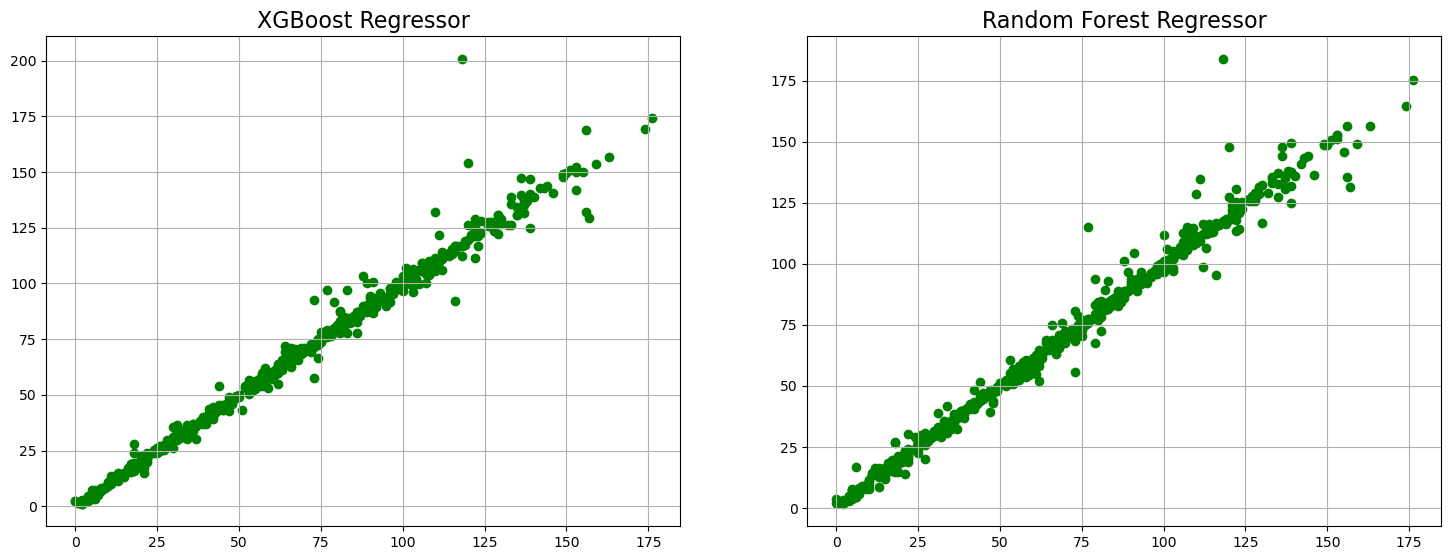

In [35]:
plt.rcParams["figure.figsize"] = (18, 14) 

plt.subplot(2,2,1)
plt.title("XGBoost Regressor", fontsize=16)
plt.scatter(sample_xgb['Actual'], sample_xgb['Predict'], c='g')
plt.grid()

plt.subplot(2,2,2)
plt.title("Random Forest Regressor", fontsize=16)
plt.scatter(sample_rf['Actual'], sample_rf['Predict'], c='g')
plt.grid()

# model extraction

In [36]:
#Model Extraction
pickle.dump(pipe, open('ssf_womens_score_prediction_final_model.pkl','wb'))

# win probability (first innings)

In [37]:
#load data
first_innings_win_portability_df = pickle.load(open('ssf_womens_first_innings_win.pkl','rb'))
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Otago,Central Districts,Napier,181,1
1,Otago,Central Districts,Napier,181,1
2,Otago,Central Districts,Napier,181,1
3,Otago,Central Districts,Napier,181,1
4,Otago,Central Districts,Napier,181,1
...,...,...,...,...,...
11633,Canterbury,Wellington,Christchurch,145,1
11634,Canterbury,Wellington,Christchurch,145,1
11635,Canterbury,Wellington,Christchurch,145,1
11636,Canterbury,Wellington,Christchurch,145,1


In [38]:
first_innings_win_portability_df.to_csv(r'ssf_womens_first_innings_win.csv', index=False, header=True)
first_innings_win_portability_df = pd.read_csv(r'ssf_womens_first_innings_win.csv')
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Otago,Central Districts,Napier,181,1
1,Otago,Central Districts,Napier,181,1
2,Otago,Central Districts,Napier,181,1
3,Otago,Central Districts,Napier,181,1
4,Otago,Central Districts,Napier,181,1
...,...,...,...,...,...
11633,Canterbury,Wellington,Christchurch,145,1
11634,Canterbury,Wellington,Christchurch,145,1
11635,Canterbury,Wellington,Christchurch,145,1
11636,Canterbury,Wellington,Christchurch,145,1


In [39]:
X1 = first_innings_win_portability_df.drop(columns=['result_first_innings'])
y1 = first_innings_win_portability_df['result_first_innings'].values

X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, test_size=0.1, random_state=1)

In [40]:
X1_train

,batting_team,bowling_team,city,runs_y
8040,Central Districts,Auckland,Auckland,135
4611,Auckland,Wellington,Auckland,117
11531,Canterbury,Wellington,Christchurch,145
4137,Wellington,Central Districts,Wellington,162
9943,Canterbury,Auckland,Auckland,137
...,...,...,...,...
7813,Auckland,Otago,Auckland,106
10955,Central Districts,Otago,Dunedin,108
905,Auckland,Wellington,Wellington,139
5192,Otago,Central Districts,Dunedin,134


In [41]:
trf1 = ColumnTransformer([
    ('trf1', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

In [42]:
pipe1 = Pipeline(steps=[
    ('step1',trf1),
    ('step2', LogisticRegression()) #solver='liblinear'
])

pipe1.fit(X1_train, y1_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [43]:
y1_pred = pipe1.predict(X1_test)

print('Accuracy Score: '+str(accuracy_score(y1_test,y1_pred)*100))

Accuracy Score: 86.5979381443299


In [44]:
confusion_matrix_lr = confusion_matrix(y1_test, y1_pred)
confusion_matrix_lr

array([[446, 100],
       [ 56, 562]])

In [45]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       546
           1       0.85      0.91      0.88       618

    accuracy                           0.87      1164
   macro avg       0.87      0.86      0.86      1164
weighted avg       0.87      0.87      0.87      1164



In [46]:
pipe1.predict_proba(X1_test)[4]

array([0.23826988, 0.76173012])

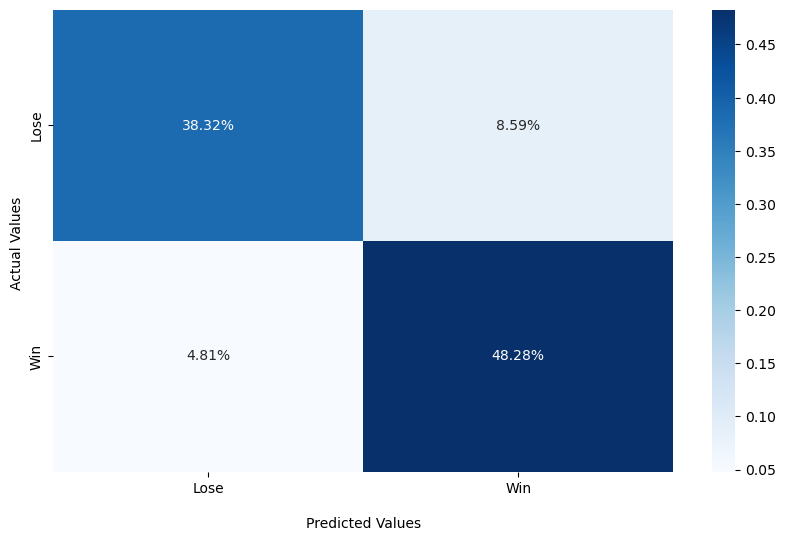

In [47]:
plt.rcParams["figure.figsize"] = (10, 6) 

ax = sns.heatmap(confusion_matrix_lr/np.sum(confusion_matrix_lr), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Logistic Regression\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
input_df = pd.DataFrame({'batting_team': ['Central Districts'], 'bowling_team': ['Auckland'], 'city': ['Auckland'], 'runs_y': [190]})
result = pipe1.predict_proba(input_df)

loss = result[0][1]
win = result[0][0]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

win: 7%
loss: 93%


# Model Extraction

In [50]:
#Model Extraction
pickle.dump(pipe1, open('ssf_1st_innings_win_prediction_final_model.pkl','wb'))

# win probability (second innings)

In [51]:
#load data
second_innings_win_portability_df = pickle.load(open('ssf_womens_second_innings_win.pkl','rb'))
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Central Districts,Otago,Napier,4,182,178,119,10,24.00,8.97,0
1,Central Districts,Otago,Napier,5,182,177,118,10,15.00,9.00,0
2,Central Districts,Otago,Napier,5,182,177,117,10,10.00,9.08,0
3,Central Districts,Otago,Napier,5,182,177,116,10,7.50,9.16,0
4,Central Districts,Otago,Napier,5,182,177,115,10,6.00,9.23,0
...,...,...,...,...,...,...,...,...,...,...,...
10690,Wellington,Canterbury,Christchurch,129,146,17,5,2,6.73,20.40,0
10691,Wellington,Canterbury,Christchurch,129,146,17,4,2,6.67,25.50,0
10692,Wellington,Canterbury,Christchurch,131,146,15,3,2,6.72,30.00,0
10693,Wellington,Canterbury,Christchurch,131,146,15,2,1,6.66,45.00,0


In [52]:
second_innings_win_portability_df.to_csv(r'ssf_womens_second_innings_win.csv', index=False, header=True)
second_innings_win_portability_df = pd.read_csv(r'ssf_womens_second_innings_win.csv')
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Central Districts,Otago,Napier,4,182,178,119,10,24.00,8.97,0
1,Central Districts,Otago,Napier,5,182,177,118,10,15.00,9.00,0
2,Central Districts,Otago,Napier,5,182,177,117,10,10.00,9.08,0
3,Central Districts,Otago,Napier,5,182,177,116,10,7.50,9.16,0
4,Central Districts,Otago,Napier,5,182,177,115,10,6.00,9.23,0
...,...,...,...,...,...,...,...,...,...,...,...
10658,Wellington,Canterbury,Christchurch,129,146,17,5,2,6.73,20.40,0
10659,Wellington,Canterbury,Christchurch,129,146,17,4,2,6.67,25.50,0
10660,Wellington,Canterbury,Christchurch,131,146,15,3,2,6.72,30.00,0
10661,Wellington,Canterbury,Christchurch,131,146,15,2,1,6.66,45.00,0


In [53]:
X2 = second_innings_win_portability_df.drop(columns=['result'])
y2 = second_innings_win_portability_df['result'].values

X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.1, random_state=1)

In [54]:
X2_train

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr
4400,Canterbury,Wellington,Christchurch,69,146,77,42,6,5.31,11.00
4482,Auckland,Northern Districts,Auckland,38,104,66,78,8,5.43,5.08
9165,Auckland,Canterbury,Auckland,103,138,35,9,4,5.57,23.33
5722,Northern Districts,Canterbury,Mount Maunganui,5,143,138,112,10,3.75,7.39
9664,Northern Districts,Auckland,Mount Maunganui,31,93,62,89,7,6.00,4.18
...,...,...,...,...,...,...,...,...,...,...
2895,Canterbury,Northern Districts,Hamilton,115,125,10,36,7,8.21,1.67
7813,Otago,Wellington,Hamilton,74,176,102,38,2,5.41,16.11
905,Wellington,Auckland,Wellington,125,140,15,24,8,7.81,3.75
5192,Wellington,Auckland,Auckland,43,90,47,91,8,8.90,3.10


In [55]:
trf2 = ColumnTransformer([
    ('trf2', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

In [56]:
pipe2 = Pipeline(steps=[
    ('step1',trf2),
    ('step2',LogisticRegression()) #solver='liblinear'
])

pipe2.fit(X2_train,y2_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [57]:
y2_pred = pipe2.predict(X2_test)
print('Accuracy Score: '+str(accuracy_score(y2_test, y2_pred)*100))

Accuracy Score: 89.03467666354264


In [58]:
confusion_matrix1 = confusion_matrix(y2_test, y2_pred)
confusion_matrix1

array([[560,  59],
       [ 58, 390]])

In [59]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       619
           1       0.87      0.87      0.87       448

    accuracy                           0.89      1067
   macro avg       0.89      0.89      0.89      1067
weighted avg       0.89      0.89      0.89      1067



In [60]:
pipe2.predict_proba(X2_test)[10]

array([0.00538341, 0.99461659])

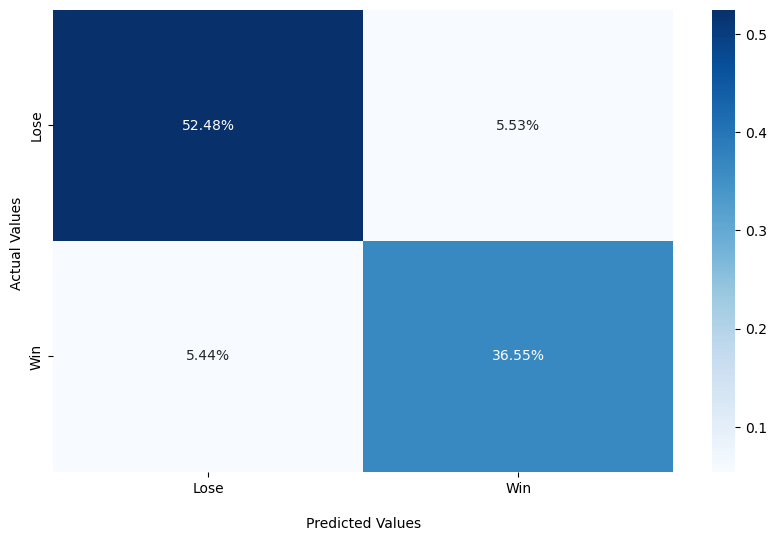

In [61]:
plt.rcParams["figure.figsize"] = (10, 6) 

ax = sns.heatmap(confusion_matrix1/np.sum(confusion_matrix1), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Model-1\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [62]:
input_df = pd.DataFrame({'batting_team': ['Canterbury'], 'bowling_team': ['Wellington'], 'city': ['Sharjah'], 'current_score':[159], 'target_runs':[169], 'runs_left':[10], 'balls_left': [2], 'wickets_left':[7], 'crr':[8.08], 'rrr': [30.0]})
result = pipe2.predict_proba(input_df)

loss = result[0][0]
win = result[0][1]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

ValueError: Found unknown categories ['Peshawar Zalmi'] in column 0 during transform

# Model Extraction

In [310]:
#Model Extraction
pickle.dump(pipe2, open('ssf_2nd_innings_win_prediction_final_model.pkl','wb'))